# Space datasets description

In [1]:
import numpy as np
from sci import SpaceEnv, DataMaster
import matplotlib.pyplot as plt
import proplot as pplt

WARNING ⚠️ : this package contains data with synthetic outcomes!
No inferences about the source data collection can be made.
By using it, you agree to understand its limitations and purpose.
The sole objective of SpaCE is to support the development of new
spatial confounding methods.

WARNING ⚠️ : this package contains data with synthetic outcomes!
No inferences about the source data collection can be made.
By using it, you agree to understand its limitations and purpose.
The sole objective of SpaCE is to support the development of new
spatial confounding methods.



/home/idies/workspace/Temporary/akhot2/scratch/spacedata/lib/python3.10/site-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


In [2]:
space_master = DataMaster()
space_master

Available datasets (total: 4):

  healthd_dmgrcs_mortality_disc
  climate_wfsmoke_minrty_disc
  county_dmgrcs_election_disc
  cdcsvi_nohsdp_poverty_disc

In [3]:
master = space_master.master.copy()
master

,treatment_type,collection
environments,,
healthd_dmgrcs_mortality_disc,binary,Air Pollution and Mortality
climate_wfsmoke_minrty_disc,binary,Heat Exposure and Wildfires
county_dmgrcs_election_disc,binary,Welfare and Elections
cdcsvi_nohsdp_poverty_disc,binary,Social Vulnerability and Welfare


In [4]:
collections = space_master.list_collections()
collections

['Air Pollution and Mortality',
 'Heat Exposure and Wildfires',
 'Welfare and Elections',
 'Social Vulnerability and Welfare']

In [5]:
space_envs = space_master.list_envs()
space_envs

['healthd_dmgrcs_mortality_disc',
 'climate_wfsmoke_minrty_disc',
 'county_dmgrcs_election_disc',
 'cdcsvi_nohsdp_poverty_disc']

In [6]:
len(space_envs)

4

In [7]:
envname = space_envs[0]
env = SpaceEnv(envname)
env

Downloaded: filename healthd_dmgrcs_mortality_disc.zip, id 11646679, saved to /tmp/healthd_dmgrcs_mortality_disc.zip


SpaceEnv with birth certificate config:
{
  "spaceenv": {
    "base_name": "${hydra:runtime.choices.spaceenv}",
    "covariates": [
      "qd_mean_pm25",
      {
        "poverty": [
          "cs_poverty",
          "cs_ed_below_highschool"
        ]
      },
      "cs_population_density",
      "cdc_mean_bmi",
      {
        "smoking": [
          "cdc_pct_cusmoker",
          "cdc_pct_sdsmoker",
          "cdc_pct_fmsmoker",
          "cdc_pct_nvsmoker",
          "cdc_pct_nnsmoker"
        ]
      },
      {
        "temperature": [
          "gmet_mean_tmmn",
          "gmet_mean_summer_tmmn",
          "gmet_mean_winter_tmmn",
          "gmet_mean_tmmx",
          "gmet_mean_summer_tmmx",
          "gmet_mean_winter_tmmx"
        ]
      },
      {
        "relative_humidity": [
          "gmet_mean_rmn",
          "gmet_mean_summer_rmn",
          "gmet_mean_winter_rmn",
          "gmet_mean_rmx",
          "gmet_mean_summer_rmx",
          "gmet_mean_winter_rmx"
        ]
    

In [8]:
for s in space_envs:
    env = SpaceEnv(s, dir="downloads") # to download all environments

Downloaded: filename healthd_dmgrcs_mortality_disc.zip, id 11646679, saved to downloads/healthd_dmgrcs_mortality_disc.zip
Downloaded: filename climate_wfsmoke_minrty_disc.zip, id 11646676, saved to downloads/climate_wfsmoke_minrty_disc.zip
Downloaded: filename county_dmgrcs_election_disc.zip, id 11646673, saved to downloads/county_dmgrcs_election_disc.zip
Downloaded: filename cdcsvi_nohsdp_poverty_disc.zip, id 11646678, saved to downloads/cdcsvi_nohsdp_poverty_disc.zip


## Summarize number of covariates

In [9]:
num_covars = dict()
for s in space_envs:
    env = SpaceEnv(s)
    num_covars[s] = len(env.metadata["covariate_groups"])
num_covars

Downloaded: filename climate_wfsmoke_minrty_disc.zip, id 11646676, saved to /tmp/climate_wfsmoke_minrty_disc.zip
Downloaded: filename county_dmgrcs_election_disc.zip, id 11646673, saved to /tmp/county_dmgrcs_election_disc.zip
Downloaded: filename cdcsvi_nohsdp_poverty_disc.zip, id 11646678, saved to /tmp/cdcsvi_nohsdp_poverty_disc.zip


{'healthd_dmgrcs_mortality_disc': 9,
 'climate_wfsmoke_minrty_disc': 10,
 'county_dmgrcs_election_disc': 14,
 'cdcsvi_nohsdp_poverty_disc': 11}

In [10]:
sum(num_covars.values())

44

In [11]:
master = space_master.master.copy()
master.reset_index(inplace=True)

num_covars = dict()
for c in collections:
    environments = master.environments[master.collection == c]
    print(environments)
    covars = []
    for e in environments:
        env = SpaceEnv(e)
        covars.extend(env.metadata["covariates"])
    num_covars[c] = len(set(covars))
num_covars

0    healthd_dmgrcs_mortality_disc
Name: environments, dtype: object
1    climate_wfsmoke_minrty_disc
Name: environments, dtype: object
2    county_dmgrcs_election_disc
Name: environments, dtype: object
3    cdcsvi_nohsdp_poverty_disc
Name: environments, dtype: object


{'Air Pollution and Mortality': 28,
 'Heat Exposure and Wildfires': 22,
 'Welfare and Elections': 40,
 'Social Vulnerability and Welfare': 11}

## Summarize graph nodes and edges

In [12]:
num_nodes = dict()
for s in space_envs:
    env = SpaceEnv(s)
    num_nodes[s] = {
        'nodes': env.graph.number_of_nodes(), #len(list(env.graph))
        'edges': env.graph.number_of_edges() 
    }
num_nodes

{'healthd_dmgrcs_mortality_disc': {'nodes': 2908, 'edges': 8241},
 'climate_wfsmoke_minrty_disc': {'nodes': 8451, 'edges': 25812},
 'county_dmgrcs_election_disc': {'nodes': 3044, 'edges': 8918},
 'cdcsvi_nohsdp_poverty_disc': {'nodes': 6693, 'edges': 20861}}

##

## Summarize feature importance

In [13]:
env.metadata["outcome_importance"]

{'EP_NOINT': '0.1509598707779215',
 'EP_DISABL': '0.06052701279781069',
 'EP_NOVEH': '0.060194651694844246',
 'treatment': '0.05999014408536914',
 'EP_SNGPNT': '0.04578156449395203',
 'EP_AGE65': '0.043701514037741',
 'EP_AGE17': '0.030932289034239873',
 'EP_UNEMP': '0.0303513464861159',
 'EP_LIMENG': '0.024465441527404142',
 'EP_MUNIT': '0.021784199138451903',
 'EP_MINRTY': '0.01687839256364568',
 'RPL_THEME3': '0.011713168913119475'}

In [14]:
env.metadata["treatment_importance"]

{'EP_LIMENG': '0.3964907017213224',
 'EP_NOINT': '0.17155032804247752',
 'EP_MUNIT': '0.05998813517646269',
 'EP_DISABL': '0.03995173482993479',
 'EP_MINRTY': '0.0197337356887254',
 'EP_AGE17': '0.015193765821687334',
 'EP_NOVEH': '0.015133232890126866',
 'EP_SNGPNT': '0.008414077486910566',
 'EP_UNEMP': '0.006961287129458354',
 'EP_AGE65': '0.006416490745413756',
 'RPL_THEME3': '0.002966113646464891'}

In [15]:
env.metadata["confounding_score"]

{'EP_NOINT': '0.1509598707779215',
 'EP_DISABL': '0.03995173482993479',
 'EP_LIMENG': '0.024465441527404142',
 'EP_MUNIT': '0.021784199138451903',
 'EP_MINRTY': '0.01687839256364568',
 'EP_AGE17': '0.015193765821687334',
 'EP_NOVEH': '0.015133232890126866',
 'EP_SNGPNT': '0.008414077486910566',
 'EP_UNEMP': '0.006961287129458354',
 'EP_AGE65': '0.006416490745413756',
 'RPL_THEME3': '0.002966113646464891'}

In [16]:
conf_score = dict()
for s in space_envs:
    env = SpaceEnv(s)
    conf_score[s] = {
        'min': min(env.metadata["confounding_score"].values()), #len(list(env.graph))
        'max': max(env.metadata["confounding_score"].values())
    }
conf_score

{'healthd_dmgrcs_mortality_disc': {'min': '0.00023874742012500045',
  'max': '0.022203510071625906'},
 'climate_wfsmoke_minrty_disc': {'min': '0.008271727367934195',
  'max': '0.07180853171249046'},
 'county_dmgrcs_election_disc': {'min': '0.0', 'max': '0.06879994648475256'},
 'cdcsvi_nohsdp_poverty_disc': {'min': '0.002966113646464891',
  'max': '0.1509598707779215'}}

In [17]:
print("\n".join(env.metadata.keys()))

base_name
treatment
predicted_outcome
synthetic_outcome
confounding_score
confounding_score_erf
confounding_score_ite
confounding_score_ate
spatial_scores
outcome_importance
treatment_importance
covariates
treatment_values
covariate_groups
original_residual_spatial_score
synthetic_residual_spatial_score
original_nbrs_corr
synthetic_nbrs_corr


In [18]:
conf_score_list = list()
for s in space_envs:
    env = SpaceEnv(s)
    conf_score_list.extend(list(env.metadata["confounding_score_erf"].values()))
conf_score = np.array(conf_score_list, dtype=float)

In [19]:
len(conf_score)

44

In [20]:
print(f"min: {conf_score.min()}")
print(f"q25: {np.quantile(conf_score, 0.25)}")
print(f"median: {np.median(conf_score)}")
print(f"mean: {conf_score.mean()}")
print(f"q75: {np.quantile(conf_score, 0.75)}")
print(f"max: {conf_score.max()}")

min: 0.0018387120217084885
q25: 0.00628990912809968
median: 0.010905117262154818
mean: 0.01643645686139776
q75: 0.01976368436589837
max: 0.0514945313334465


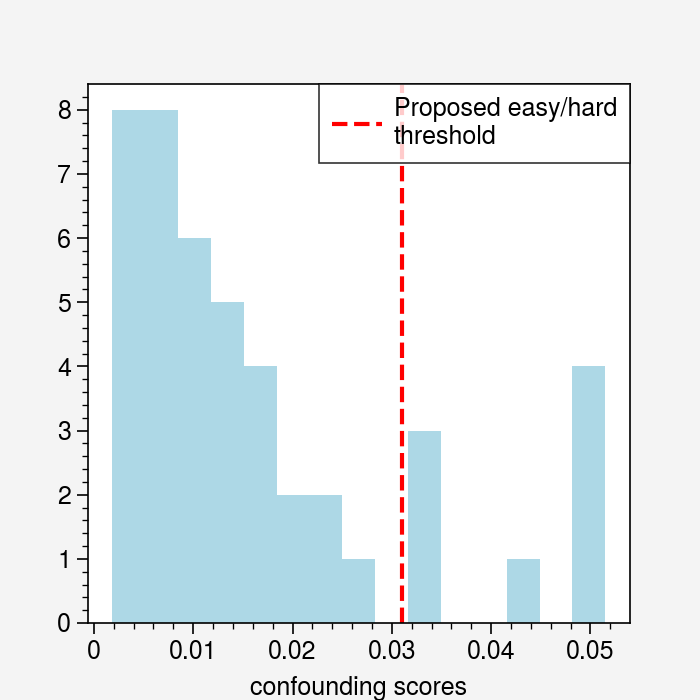

In [21]:
# make a histogram of the confounding scores
# plt.hist(conf_score, bins=20);

# make a histogram of the confounding scores
plt.figure(figsize=(3.5, 3.5))
plt.hist(conf_score, bins=15, color="lightblue");
plt.xlabel("confounding scores")
plt.axvline(x=0.031, color="red", linestyle="--", label="Proposed easy/hard\nthreshold")
plt.text(0.04, 10, "harder", color="black", fontsize=9, rotation=90)
plt.text(0.0, 10, "easier", color="black", fontsize=9, rotation=90)
plt.grid(False)
plt.legend();
# plt.savefig("scores-conf.png", bbox_inches="tight")

## Summarize Spatial Smoothness

In [22]:
len(env.metadata["spatial_scores"])

11

In [23]:
len(env.metadata["covariate_groups"])

11

In [24]:
spatial_score_list = list()
for s in space_envs:
    env = SpaceEnv(s)
    for d in env.make_all():
        spatial_score_list.append(d.smoothness_score)
spatial_score = np.array(spatial_score_list)
spatial_score = spatial_score.astype(float)

In [25]:
len(spatial_score)

44

In [26]:
print(f"min: {spatial_score.min()}")
print(f"q25: {np.quantile(spatial_score, 0.25)}")
print(f"median: {np.median(spatial_score)}")
print(f"mean: {spatial_score.mean()}")
print(f"q75: {np.quantile(spatial_score, 0.75)}")
print(f"max: {spatial_score.max()}")

min: 0.024079878173124958
q25: 0.307480398384352
median: 0.5009712360081532
mean: 0.5079572407487205
q75: 0.6994899109913193
max: 0.9563439028134079


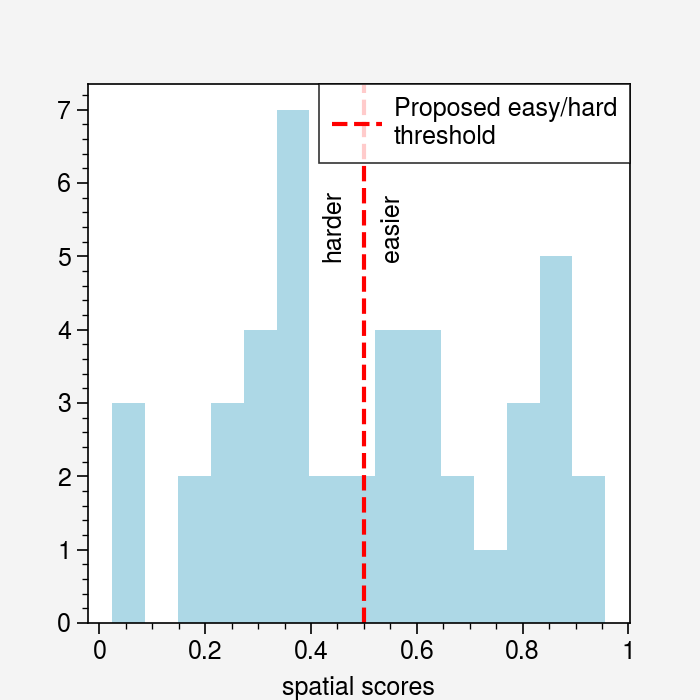

In [27]:
# make a histogram of the spatial smoothness scores
plt.figure(figsize=(3.5, 3.5))
plt.hist(spatial_score, bins=15, color="lightblue")
plt.xlabel("spatial scores")
plt.axvline(x=0.5, color="red", linestyle="--", label="Proposed easy/hard\nthreshold")
plt.text(0.42, 5, "harder", color="black", fontsize=9, rotation=90)
plt.text(0.53, 5, "easier", color="black", fontsize=9, rotation=90)
plt.grid(False)
plt.legend();
# plt.savefig("scores-spatial.png", bbox_inches="tight")

## Number of datasets for each level of difficulty

In [28]:
print("conf.   spatial  #")
print(f"easy    low      {np.sum((conf_score < 0.03) & (spatial_score < 0.5))}")
print(f"hard    high     {np.sum((conf_score > 0.03) & (spatial_score > 0.5))}")
print(f"easy    high     {np.sum((conf_score < 0.03) & (spatial_score > 0.5))}")
print(f"hard    low      {np.sum((conf_score > 0.03) & (spatial_score < 0.5))}")


conf.   spatial  #
easy    low      18
hard    high     4
easy    high     18
hard    low      4
